**Author:** Zhenning Liu & Marija Starovoita

This notebook serves the purpose of visualizing variables and exploring preliminary relationships.

**Resources:**

- **3D Interactive Plot:** 
  1. [Plotly: 3D Scatter Plots](https://plotly.com/python/3d-scatter-plots/)
  2. [YouTube: Python Data Analysis Tips – Plotly Express 3D Scatter Plot](https://www.youtube.com/watch?v=CB3h2KE_-C4)
  3. [NumPy: meshgrid function](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

- **Heatmap:** <br>
  4. [YouTube: Creating Geospatial Heatmaps With Plotly Express MapBox and Folium in Python](https://www.youtube.com/watch?v=vSGWmZre31A) <br>
  5. [Folium documentation](https://python-visualization.github.io/folium/latest/user_guide/plugins/heatmap.html)



In [30]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly
import plotly.express as px
import plotly.io as pio
import nbformat
import ipywidgets

# Prepare data

In [31]:
dir = os.getcwd()
parent_dir = os.path.join(dir, "..")
data_path = os.path.join(parent_dir, "data")
file_path = os.path.join(data_path, "summary_redfin.csv")
house_df = pd.read_csv(file_path)
house_df.dropna(subset=['price', 'price_per_sq_ft', 'longitude', 'latitude', 'avg_restaurant_price_level', 'avg_restaurant_rating'], inplace=True)
print(house_df.isna().sum())
house_df.head()

url                              0
type                             0
price                            0
sq_ft                         1123
price_per_sq_ft                  0
latitude                         0
longitude                        0
beds                             2
baths                           15
address                          0
tags                           934
year_built                     345
property_type                   14
amenities.hoa_dues            2050
amenities.community              0
amenities.county                 0
amenities.built                344
amenities.property_type          0
amenities.heating_cooling     1503
amenities.laundry             1922
amenities.parking              933
amenities.lot_size            2410
num_restaurants                  0
avg_restaurant_price_level       0
avg_restaurant_rating            0
num_stores                       0
num_schools                      0
num_hospitals                    0
num_crimes          

,url,type,price,sq_ft,price_per_sq_ft,latitude,longitude,beds,baths,address,...,avg_restaurant_price_level,avg_restaurant_rating,num_stores,num_schools,num_hospitals,num_crimes,violent_crime_count,nonviolent_crime_count,most_prevalent_crime,crime_proportion
0,https://redfin.com/IL/Chicago/155-N-Harbor-Dr-...,for_sale,465000.0,998.0,466.0,41.884895,-87.615398,1.0,1.5,"155 N Harbor Dr #4004, Chicago, IL 60601",...,2.000000,3.972549,19,35,20,3121,734,2340,THEFT,0.404998
1,https://redfin.com/IL/Chicago/222-N-Columbus-D...,for_sale,289000.0,611.0,473.0,41.886684,-87.621214,1.0,1.0,"222 N Columbus Dr #2304, Chicago, IL 60601",...,2.153061,4.232710,43,59,47,8592,2105,6303,THEFT,0.437849
2,https://redfin.com/IL/Chicago/363-E-Wacker-Dr-...,for_sale,1950000.0,2260.0,863.0,41.887451,-87.617460,2.0,2.5,"363 E Wacker Dr #3103, Chicago, IL 60601",...,2.013699,4.074713,25,39,46,5873,1452,4307,THEFT,0.423804
3,https://redfin.com/IL/Chicago/200-N-Dearborn-S...,for_sale,255000.0,775.0,329.0,41.886088,-87.630010,1.0,1.0,"200 N Dearborn St #4608, Chicago, IL 60601",...,1.958621,4.207895,67,68,27,10517,2482,7724,THEFT,0.425977
4,https://redfin.com/IL/Chicago/400-E-Randolph-S...,for_sale,389000.0,650.0,598.0,41.885003,-87.616864,0.0,1.0,"400 E Randolph St #1811, Chicago, IL 60601",...,2.035714,4.139394,23,38,24,5222,1155,3987,THEFT,0.476637


In [32]:
numerical_cols = house_df.select_dtypes(include = np.number).columns.tolist()
house_df[numerical_cols] = house_df[numerical_cols].astype(float)

# Check Distribution

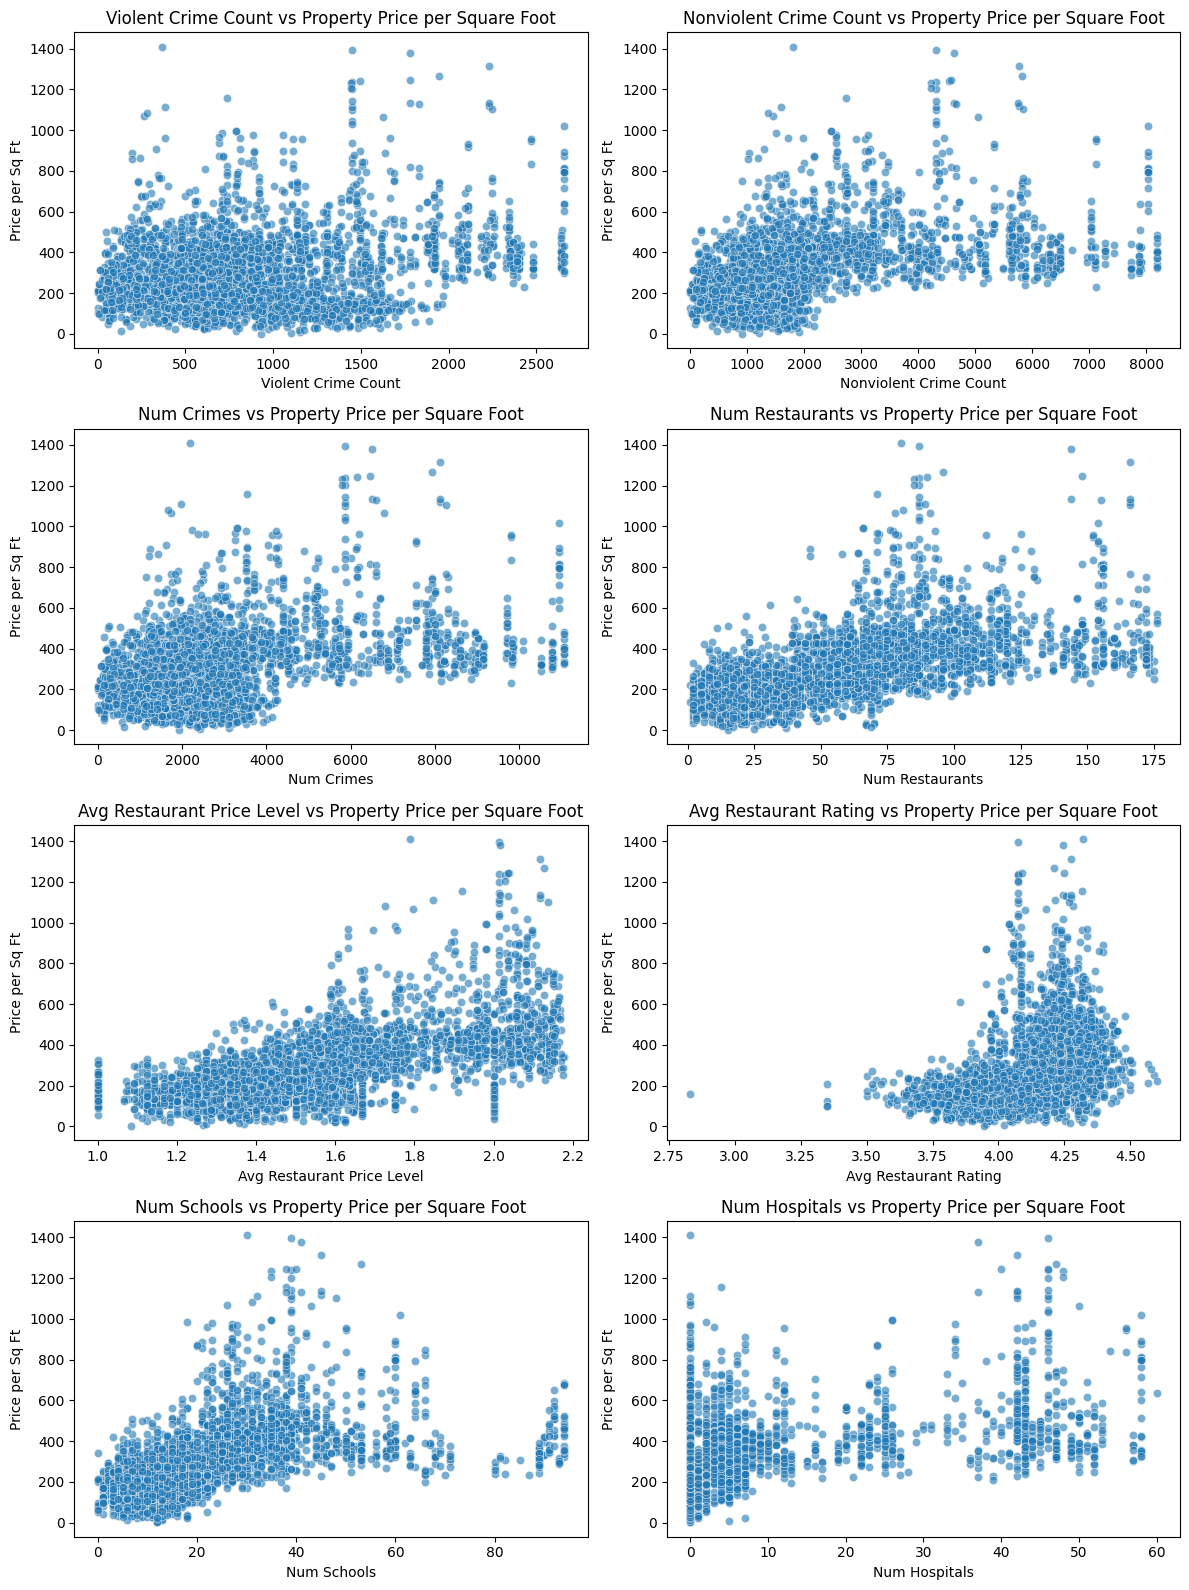

In [33]:
features = ["violent_crime_count", "nonviolent_crime_count", "num_crimes", "num_restaurants", 
            "avg_restaurant_price_level", "avg_restaurant_rating", "num_schools", "num_hospitals"]

# 4 x 2 figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(features):
    sns.scatterplot(data=house_df, x=column, y="price_per_sq_ft", ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{column.replace('_', ' ').title()} vs Property Price per Square Foot")
    axes[i].set_xlabel(column.replace('_', ' ').title())
    axes[i].set_ylabel("Price per Sq Ft")

plt.tight_layout()
plt.show()

## Overlay the features

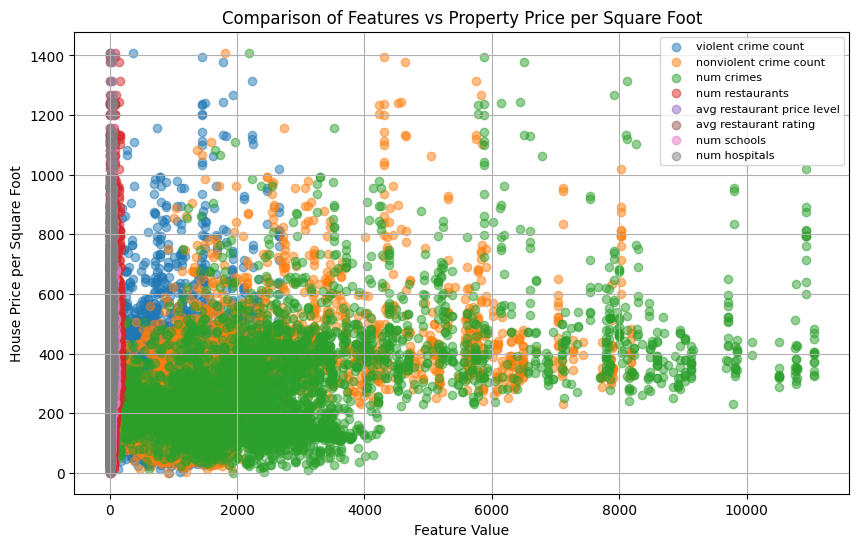

In [34]:
plt.figure(figsize=(10, 6))

# Define colors
colors = sns.color_palette("tab10", len(features))  

for i, column in enumerate(features):
    plt.scatter(house_df[column], house_df["price_per_sq_ft"], alpha=0.5, label=column.replace("_", " "), color=colors[i])

plt.xlabel("Feature Value")
plt.ylabel("House Price per Square Foot")
plt.title("Comparison of Features vs Property Price per Square Foot")
plt.legend(loc="best", fontsize=8)
plt.grid(True)
plt.show()


## Correlation matrix

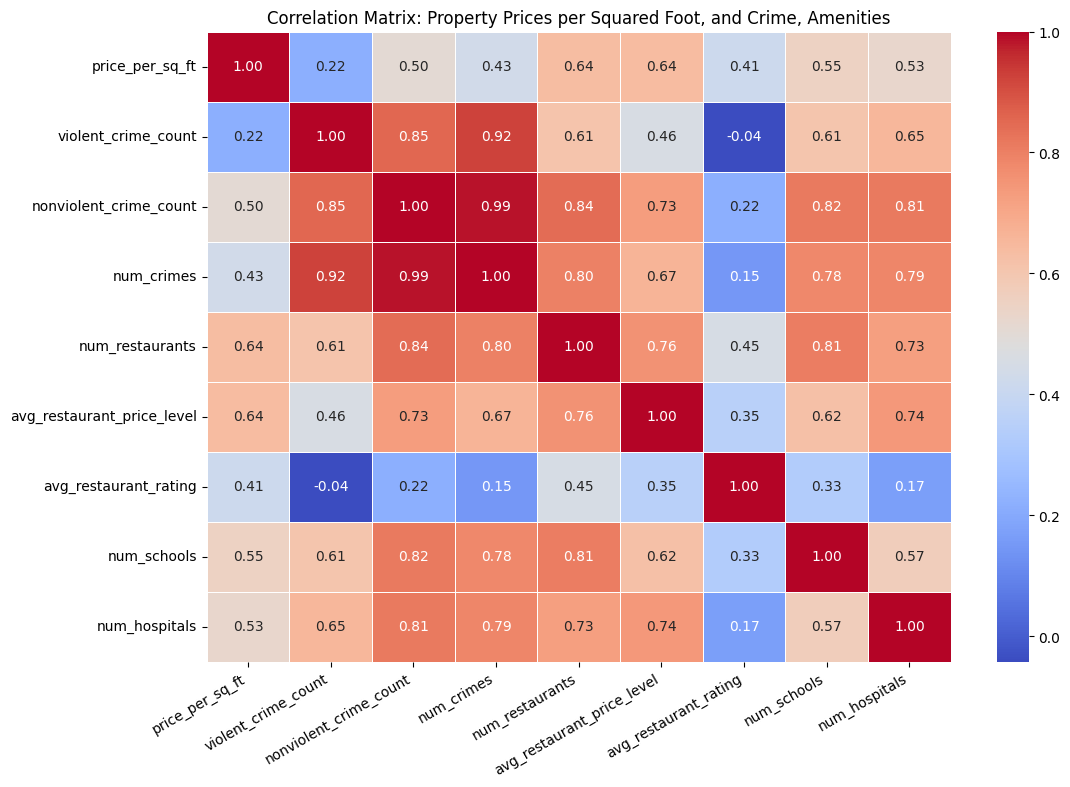

In [35]:
features = ['price_per_sq_ft'] + features
corr_matrix = house_df[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=30, ha="right") 
plt.yticks(rotation=0)  
plt.subplots_adjust(bottom=0.25)  
plt.title("Correlation Matrix: Property Prices per Squared Foot, and Crime, Amenities")
plt.show()

## Interaction

### Raw 3d scatter plot

In [36]:
fig = px.scatter_3d(
    house_df, 
    x='num_crimes',
    y='num_restaurants',
    z='price_per_sq_ft', 
    color='price_per_sq_ft',
    title='<b>3D Scatter Plot: Crimes vs Restaurants vs Price</b>',
    labels={
        'Crimes': 'Crime Reports',
        'Restaurants': 'Restaurants',
        'Price_per_sq_ft': 'Price ($/sq ft)'
    },
    height=800
)

# Customize the plot
fig.update_layout(
    scene=dict(
        xaxis_title='Crime counts',
        yaxis_title='Restaurants',
        zaxis_title='Price ($/sq ft)',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.8)
        )
    ),
    coloraxis_colorbar=dict(
        title='Price/sq ft',
        title_side='right',
        tickprefix='$'
    )
)

# Add hover information
fig.update_traces(
    hovertemplate=(
        "<b>Crimes:</b> %{x}<br>"
        "<b>Restaurants:</b> %{y}<br>"
        "<b>Price:</b> $%{z:.2f}"
    )
)

# Show the plot
fig.show()

### 3D graph controlling for effect of other variables

In [37]:
# Create interaction term
house_df['crimes_restaurants'] = house_df['num_crimes'] * house_df['num_restaurants']

# Fit regression model
X = sm.add_constant(house_df[[
    'num_crimes', 'num_restaurants', 'num_hospitals', 'num_stores', 'num_schools',
    'avg_restaurant_price_level', 'avg_restaurant_rating', 'crimes_restaurants'
]])
y = house_df['price_per_sq_ft']
model = sm.OLS(y, X).fit()

# Generate prediction grid
crime_vals = np.linspace(house_df['num_crimes'].min(), house_df['num_crimes'].max(), 50)
restaurant_vals = np.linspace(house_df['num_restaurants'].min(), 
                            house_df['num_restaurants'].max(), 50)
crime_grid, restaurant_grid = np.meshgrid(crime_vals, restaurant_vals)

# Create grid DataFrame with mean values for other features
grid_df = pd.DataFrame({
    'num_crimes': crime_grid.ravel(),
    'num_restaurants': restaurant_grid.ravel(),
    'num_hospitals': house_df['num_hospitals'].mean(),
    'num_stores': house_df['num_stores'].mean(),
    'num_schools': house_df['num_schools'].mean(),
    'avg_restaurant_price_level': house_df['avg_restaurant_price_level'].mean(),
    'avg_restaurant_rating': house_df['avg_restaurant_rating'].mean(),
    'const': 1
})

# Add interaction term
grid_df['crimes_restaurants'] = grid_df['num_crimes'] * grid_df['num_restaurants']

# Ensure column order matches model
model_features = ['const'] + model.params.index.tolist()[1:]
grid_df = grid_df[model_features]

# Generate predictions
grid_df['price'] = model.predict(grid_df)

# Create interactive 3D plot
fig = px.scatter_3d(
    grid_df,
    x='num_crimes',
    y='num_restaurants',
    z='price',
    color='price',
    color_continuous_scale='Viridis',
    title='<b>Housing Price Interaction: Crimes vs Restaurants</b>',
    labels={
        'num_crimes': 'Crime counts',
        'num_restaurants': 'Restaurants',
        'price': 'Price ($/sq ft)'
    },
    height=800
)

# Ajudst visualization
fig.update_layout(
    scene=dict(
        camera=dict(eye=dict(x=1.5, y=-1.5, z=0.8)),
        xaxis_title_font=dict(size=14),
        yaxis_title_font=dict(size=14),
        zaxis_title_font=dict(size=14)
    ),
    coloraxis_colorbar=dict(
        title='Price/sq ft',
        title_side='right',
        tickprefix='$'
    )
)

# add hover information
fig.update_traces(
    hovertemplate=(
        "<b>Crimes:</b> %{x}<br>"
        "<b>Restaurants:</b> %{y}<br>"
        "<b>Predicted Price:</b> $%{z:.2f}"
    )
)

fig

# Heatmap

In [29]:
m = folium.Map(location=[house_df['latitude'].mean(), house_df['longitude'].mean()], zoom_start=12)

# Adding layers to map
# Price Layer
price_layers = folium.FeatureGroup(name='Price')
heat_data_price = [[row['latitude'], row['longitude'], row['price_per_sq_ft']] for index, row in house_df.iterrows()]
HeatMap(
    heat_data_price, 
    radius=15, 
    blur=10, 
    gradient={'0.2': 'blue', '0.4': 'cyan', '0.6': 'lime', '0.8': 'yellow', '1': 'red'},
    max_zoom=1
).add_to(price_layers)
price_layers.add_to(m)

# Crime Layer
crime_layers = folium.FeatureGroup(name='Crimes')
heat_data_crimes = [[row['latitude'], row['longitude'], row['num_crimes']] for index, row in house_df.iterrows()]
HeatMap(
    heat_data_crimes, 
    radius=20, 
    blur=8, 
    gradient={'0.2': 'gray', '0.4': 'orange', '0.6': 'red', '0.8': 'darkred', '1': 'black'},
    max_zoom=1
).add_to(crime_layers)
crime_layers.add_to(m)

# Restaurants Layer
restaurants_layer = folium.FeatureGroup(name='Restaurants')
heat_data_rest = [[row['latitude'], row['longitude'], row['num_restaurants']] for index, row in house_df.iterrows()]
HeatMap(
    heat_data_rest, 
    radius=15, 
    blur=10, 
    gradient={'0.2': 'lightgreen', '0.4': 'green', '0.6': 'darkgreen', '0.8': 'blue', '1': 'purple'},
    max_zoom=1
).add_to(restaurants_layer)
restaurants_layer.add_to(m)

# Schools Layer
schools_layer = folium.FeatureGroup(name='Schools')
heat_data_schools = [[row['latitude'], row['longitude'], row['num_schools']] for index, row in house_df.iterrows()]
HeatMap(heat_data_schools, 
        radius=15, 
        blur=0, 
        max_zoom=1,
        gradient={'0.2': 'lightblue', '0.4': 'blue', '0.6': 'purple', '0.8': 'pink', '1': 'red'}
        ).add_to(schools_layer)
schools_layer.add_to(m)

# Stores Layer
stores_layers = folium.FeatureGroup(name='Stores')
heat_data_stores = [[row['latitude'], row['longitude'], row['num_stores']] for index, row in house_df.iterrows()]
HeatMap(heat_data_stores, 
        radius=15, 
        blur=0, 
        max_zoom=1,
        gradient={'0.2': 'beige', '0.4': 'yellow', '0.6': 'orange', '0.8': 'red', '1': 'darkred'}
        ).add_to(stores_layers)
stores_layers.add_to(m)

# Hospitals Layer
hospital_layers = folium.FeatureGroup(name='Hospitals')
heat_data_hospitals = [[row['latitude'], row['longitude'], row['num_schools']] for index, row in house_df.iterrows()]
HeatMap(heat_data_hospitals, 
        radius=15, 
        blur=0, 
        max_zoom=1,
        gradient={'0.2': 'pink', '0.4': 'lightcoral', '0.6': 'red', '0.8': 'darkred', '1': 'maroon'}
        ).add_to(hospital_layers)
hospital_layers.add_to(m)

folium.LayerControl().add_to(m)

m